<a href="https://colab.research.google.com/github/mrhallonline/NLP-Workshop/blob/main/Module_4_Running_Basic_Sentiment_Analysis_Workshop_Natural_Language_Toolkit_(NLTK)_V3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 4.0 Running Basic Sentiment Analysis on Our Uncertainty Corpus


## 4.1 Reconnecting to Google Drive and basic processing
Once again since we are on to a new Colab notebook. Mounting Google drive so we can access our "raw_uncertaintyText.txt" file to once again extract our features from. We are also installing "textblob" and downloading the "vader_lexicon" both of which we will need to run our basicsentiment analysis. You will notice that at this point we have just combined them all into one code cell since we have already worked with them before.  

In [ ]:
import nltk
import requests
import pandas as pd
from nltk.tokenize import word_tokenize
nltk.download('punkt')

# This is the full shared Drive link, the file ID starts at "1i" and ends at "8S"
# https://docs.google.com/spreadsheets/d/1iJ4SG-QXfY4zw5K9B7Ununv3rb3iBj8S/edit?usp=drive_link&ouid=106477043869312333876&rtpof=true&sd=true

# the file ID from the shareable link is pasted below in orange.
file_id = "1iJ4SG-QXfY4zw5K9B7Ununv3rb3iBj8S"

# construct the download URL, you would not need to change anything here.
download_url = f"https://docs.google.com/uc?export=download&id={file_id}"

# send a GET request to the download URL and save the response content
response = requests.get(download_url)

# The next line names the file after download. If you change it here, you will also need to change in the subsequent fields.
# If you click on the folder icon in Colab you should see a file now appear called "uncertaintyText.xlsx"
# These names can be changed to suit you own data
with open("uncertaintyText.xlsx", "wb") as f:
    f.write(response.content)


# Specify the path to the Excel file this where it was placed in 2.4 so that is the file and path you want to open
excel_file_path = '/content/uncertaintyText.xlsx'

# Specify the column name you want to pull the data corpus from
column_name = 'transcript'

# Read the Excel file and extract the specified column
data = pd.read_excel(excel_file_path, engine='openpyxl')
text_column = data[column_name]


# Convert each item in the column to a string and then join them together to be saved as a text file containing all data in the transcript column.
raw_uncertaintyText = ' '.join(map(str, text_column))


# Save the string to a text file in your Google Drive
with open('/content/raw_uncertaintyText.txt', 'w') as file:
  file.write(raw_uncertaintyText)
# load data from existing text file
## this following path can be changed to access other text files that you may like to work with.
filename = '/content/raw_uncertaintyText.txt'
uncertaintyText = open(filename, 'rt', encoding='utf-8', errors='replace')

# Extracting Different Features for analysis

# The raw unchanged data from the text file now exists as a variable called "raw_uncertaintyText"
raw_uncertaintyText = uncertaintyText.read()
uncertaintyText.close()

# 1. This line converts our raw text into word tokens
# Regular expression tokenizing Gaps =False
pattern = r'\s+'
uncertainty_wordTokens = nltk.regexp_tokenize(raw_uncertaintyText, pattern, gaps=True)

# 2. This line converts our raw text into sentence tokens
uncertainty_sentTokens = nltk.sent_tokenize(raw_uncertaintyText)

# 3. This line converts our word tokens into NLTK text objects from the tokens
uncertainty_wordTextObjects = nltk.Text(uncertainty_wordTokens)

print(uncertainty_wordTokens)

print("raw_uncertaintyText is a: ",type(raw_uncertaintyText))
print("uncertainty_wordTokens is a: ",type(uncertainty_wordTokens))
print("uncertainty_sentTokens is a: ",type(uncertainty_sentTokens))
print("uncertainty_wordTextObjects is a: ",type(uncertainty_wordTextObjects))

# 4.2 Sentiment Analysis

The VADER sentiment intensity analyzer that we installed above is used to calculate a compound sentiment score for each sentence that contains one of the predefined "uncertainty" words, like "maybe," "probably," "might," etc. These scores range from -1 (most negative) to +1 (most positive), with scores around 0 being neutral.

The results could potentially reveal patterns, such as whether sentences containing words of uncertainty tend to have a generally positive, negative, or neutral sentiment. This could offer valuable insights into the emotional landscape of the classroom, particularly regarding how students express and navigate uncertainty in the learning process.

#4.3  Sentiment Analysis of Uncertainty Words in Classroom Transcripts
This code performs sentence-level sentiment analysis on our uncertainty transcript with a focus on words that indicate uncertainty. You can add or subtract words from the "uncertainty_words" dictionary in line 6. NLTK will keep track of frequency counts of each word and then analyze the sentiment intensities of the SENTENCE where the word is found. Giving the overall average sentiment for the sentences. The idea is to understand not just how often these words occur, but also the general emotional tone of the sentences in which they appear.

In [ ]:
nltk.download('vader_lexicon')
from nltk.tokenize import sent_tokenize
from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer


# Create a list of words representing uncertainty
uncertainty_words = ["maybe", "probably", "might", "perhaps", "unsure", "uncertain", "I think", "I guess"]

# text from the high school math class transcript

# Sentence Tokenization
cleaned_sentences = sent_tokenize(raw_uncertaintyText)

# Initialize VADER sentiment intensity analyzer
sia = SentimentIntensityAnalyzer()

# Create a dictionary to hold frequency count and sentiment scores for each uncertainty word
uncertainty_dict = {}

# Loop through each sentence in the cleaned transcript to find instances of uncertainty
for sentence in cleaned_sentences:
    tb = TextBlob(sentence)
    for word in uncertainty_words:
        if word.lower() in sentence.lower():
            if word not in uncertainty_dict:
                uncertainty_dict[word] = {'count': 0, 'sentiment': []}
            uncertainty_dict[word]['count'] += 1
            uncertainty_dict[word]['sentiment'].append(sia.polarity_scores(sentence)['compound'])

# Calculate average sentiment for each word of uncertainty
for word, data in uncertainty_dict.items():
    avg_sentiment = sum(data['sentiment']) / len(data['sentiment']) if data['sentiment'] else 0
    print(f"Word: {word}, Frequency: {data['count']}, Average Sentiment: {avg_sentiment}")


# 4.4 Contextual Analysis of Sentences Sentiment Surrounding Uncertainty Words:

In this code snippet, the focus is on examining the sentences that appear immediately before and after a sentence containing the word "maybe," which serves as an example of an "uncertainty word."
In this case, when "maybe" is found in a sentence, the code adds the sentence immediately preceding it to before_uncertain bucket and the one immediately following it to after_uncertain bucket. Finally, the sentences stored in before_uncertain and after_uncertain are printed for researcher analysis. These can also be saved to text or csv files if needed for later usage.

This approach could be valuable for understanding the context in which uncertainty is expressed. By looking at the sentences before and after, we can gain insights into what typically precedes or follows an expression of uncertainty, and how that might inform our understanding of the emotional or instructional dynamics of the classroom.

In [ ]:
before_uncertain = []
after_uncertain = []
for i, sentence in enumerate(cleaned_sentences):
    if "maybe" in sentence:  # Replace with any uncertainty word
        if i > 0:
            before_uncertain.append(cleaned_sentences[i-1])
        if i < len(cleaned_sentences) - 1:
            after_uncertain.append(cleaned_sentences[i+1])

# Now analyze sentiment for these sentences.
print(before_uncertain)
print(after_uncertain)

# 4.5 Plotting Sentence-Level Sentiment Scores Over Time
This code snippet visualizes the sentiment scores of a list of sentences over time. It uses the TextBlob library to compute the sentiment polarity of each sentence in the list. Then, using Matplotlib, a line plot is generated to visualize these sentiment scores. The x-axis of the plot represents the sequence number of each sentence, while the y-axis represents the corresponding sentiment score.

The resulting plot provides a way to analyze the variation of sentiment in the whole text over time.

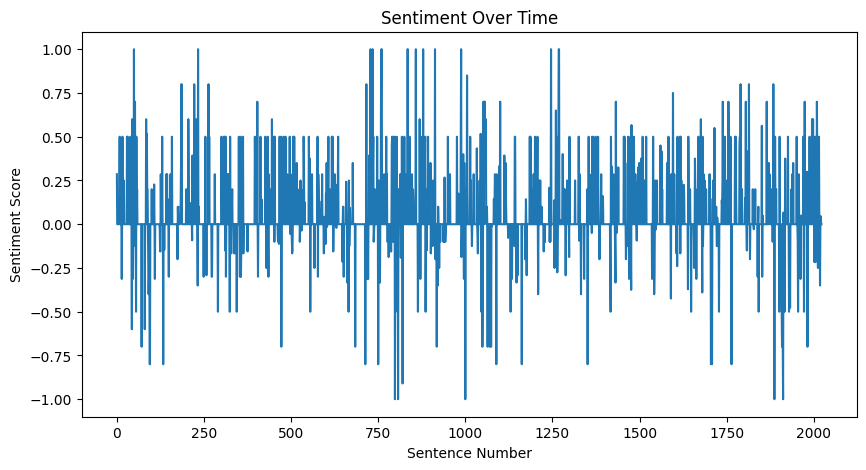

In [5]:
# First, install necessary packages


# Import libraries
import nltk
from textblob import TextBlob
import matplotlib.pyplot as plt

# Let's assume cleaned_sentences is your list of sentences
# cleaned_sentences = ["I am happy.", "I feel sad.", "Maybe I will feel better tomorrow.", ...]

# Initialize empty list to hold sentiment scores
sentiment_scores = []

# Loop over sentences and calculate sentiment
for sentence in cleaned_sentences:
    blob = TextBlob(sentence)
    sentiment_scores.append(blob.sentiment.polarity)

# Plot sentiment scores over time
plt.figure(figsize=(10, 5))
plt.plot(sentiment_scores)
plt.xlabel('Sentence Number')
plt.ylabel('Sentiment Score')
plt.title('Sentiment Over Time')
plt.show()


#4.6 Find Sentence by Index Number from Tokenized Text
You can use this function to quickly retrieve specific sentences from the pre-tokenized text corpus, especially when you want to look up sentences for context or additional analysis.

In [ ]:
def search_sentence_by_index(index, cleaned_sentences):
    if 0 <= index < len(cleaned_sentences):
        return cleaned_sentences[index]
    else:
        return "Index out of range."

# Test the function
print(search_sentence_by_index(0, cleaned_sentences))  # Replace 5 with the index you want to look up


#4.8 Filtering and Ranking Sentences with Uncertainty Words by Sentiment Score

This code snippet first defines a list of words indicating uncertainty, such as "maybe," "probably," "might," etc. Then, it filters sentences from the cleaned_sentences list to include only those that contain at least one word from the uncertainty_words list. Along with each filtered sentence, its corresponding sentiment score is also retained.

The filtered sentences are sorted based on their sentiment scores. The code then extracts the top 10 and bottom 10 sentences based on these scores. You can change this number if needed.

Finally, it displays the top 10 sentences with the highest sentiment scores and the bottom 10 sentences with the lowest sentiment scores, all containing at least one word that indicates uncertainty.

This could be useful for analyzing how uncertainty is framed in positive or negative contexts within a data corpus.

In [ ]:
#Feel free to change the words found in the dictionary
uncertainty_words = ["maybe", "probably", "might", "perhaps", "unsure", "not sure", "I think"]

# Filter the sentences that contain at least one uncertainty word
filtered_sentiment_sentence_pairs = [(score, sentence) for score, sentence in zip(sentiment_scores, cleaned_sentences) if any(word in sentence for word in uncertainty_words)]

# Sort the list of tuples by the sentiment score
sorted_pairs = sorted(filtered_sentiment_sentence_pairs, key=lambda x: x[0])

# Extract the top 10 and bottom 10 sentences
# These numbers can be changed to a longer list
top_10_sentences = sorted_pairs[-10:]
bottom_10_sentences = sorted_pairs[:10]

# Display the top 10 sentences with highest sentiment scores
print("Top 10 sentences with highest sentiment scores containing uncertainty words:")
for score, sentence in reversed(top_10_sentences):
    print(f"Score: {score}, Sentence: {sentence}")

# Display the bottom 10 sentences with lowest sentiment scores
print("\nBottom 10 sentences with lowest sentiment scores containing uncertainty words:")
for score, sentence in bottom_10_sentences:
    print(f"Score: {score}, Sentence: {sentence}")


# 4.9 Visualizing Sentiment Score Trends for Sentences with Uncertainty Words

This code snippet visualizes the sentiment scores of sentences that contain words indicating uncertainty. The list is filtered to include only sentences that have uncertainty words. Using Matplotlib, the code then plots these sentiment scores against the sentence indices. The x-axis represents the index of each sentence in the filtered list, and the y-axis represents the sentiment score of each sentence.

This visualization could help in understanding how sentiment varies over time in sentences that contain words of uncertainty.

In [ ]:
import matplotlib.pyplot as plt

# Assuming `filtered_sentiment_sentence_pairs` contains tuples of (sentiment_score, sentence)
# and you have already filtered this list to include only sentences containing uncertainty words

# Extract just the sentiment scores
filtered_sentiment_scores = [score for score, _ in filtered_sentiment_sentence_pairs]

# Generate sentence indices for x-axis
sentence_indices = list(range(1, len(filtered_sentiment_scores) + 1))

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(sentence_indices, filtered_sentiment_scores, marker='o', linestyle='-')
plt.xlabel('Sentence Index')
plt.ylabel('Sentiment Score')
plt.title('Sentiment Score Over Time for Sentences Containing Uncertainty Words')
plt.show()


Conclusion

[Module 5](https://github.com/mrhallonline/NLP-Workshop/blob/main/Module_5_Basics_of_Text_Preprocessing_Workshop_Natural_Language_Toolkit_(NLTK)_V3.ipynb)